<h1 style="text-align: center;">پروژه اول درس مبانی داده کاوی مقطع کارشناسی</h1>
<h2 style="text-align: center;">‫پیش پردازش داده ها برای تجزیه و تحلیل پیشرفته داده های مسافران تایتانیک</h2>
<h3 style="text-align: center;">Sajjad Manafi *** 994421040</h3>

<h4 style="text-align: right;">:برای اجرای موارد پروژه نیاز به استفاده از یک سری لایبرری داریم</h4>

In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy import stats

<h3 style="text-align: right;">:اهداف پروژه</h3>
<h4 style="text-align: right;">دریافت و خواندن مجموعه داده</h4>

In [406]:
train_file = pd.read_csv('./train.csv')
train_file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h4 style="text-align: right;">:پاکسازی داده ها و ارزیابی کیفیت</h4>

In [407]:
# بررسی وضعیت کلی دیتاست و نوع داده ها و قالب بندی دیتاست
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [408]:
# بررسی کلی مقادیر مختلف دیتاست
train_file.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [409]:
# بررسی تعداد مقادیر مفقود
train_file.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

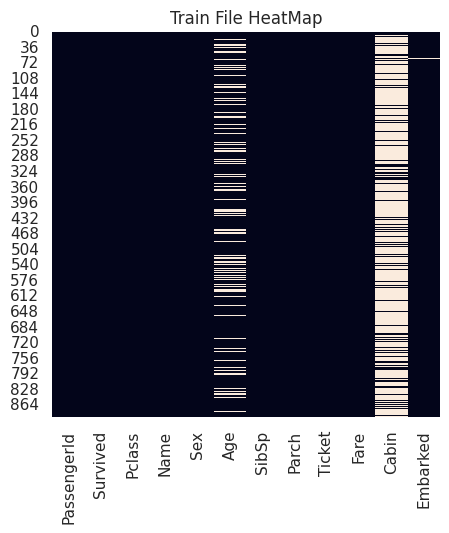

In [410]:
# بررسی مقادیر مفقوده
def plot_heatmap(dataset, title):
    fig, ax = plt.subplots(figsize=(5,5))
    plt.title(title)  
    sns.heatmap(dataset.isnull(), cbar=False)

plot_heatmap(train_file, "Train File HeatMap")

<h3 style="text-align: right;">با توجه به بررسی های انجام شده مقادیر مفقوده و موارد پرت باید مدیریت شوند</h3>

In [411]:
# بررسی موارد تکراری
duplicate_rows = train_file.duplicated()
# نمایش موارد تکراری
print(train_file[duplicate_rows])
# حذف موارد تکراری
train_file.drop_duplicates(inplace=True)

# حذف مواردی که تاثیری بر روی بررسی داده ندارد
train_file = train_file.drop(['PassengerId', "Name", "Ticket"], axis = 1)

# این مورد چون مقدار زیادی داده مفقوده دارد حذفش میکنیم
train_file.drop("Cabin", axis=1, inplace=True)

# قالب بندی ناسازگار در موارد اسم و تیکت وجود دارد ولی چون به این مقادیر نیازی نداریم میتوانیم از آن ها صرف نظر کنیم

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [412]:
# تابع برای نمایش و محاسبه مقادیر پرت
def plot_outliers(dataset, column):
    sns.boxplot(x=column, data=dataset)
    plt.show()
    
    # Calculate the IQR
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = train_file[(dataset[column] < lower_bound) | (dataset[column] > upper_bound)]
    
    # Display outliers
    print("Outliers:")
    print(outliers)

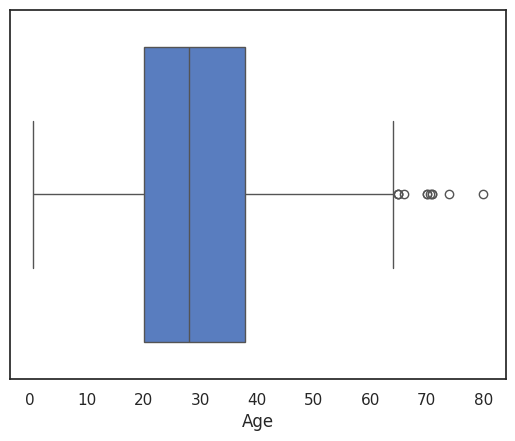

Outliers:
     Survived  Pclass   Sex   Age  SibSp  Parch     Fare Embarked
33          0       2  male  66.0      0      0  10.5000        S
54          0       1  male  65.0      0      1  61.9792        C
96          0       1  male  71.0      0      0  34.6542        C
116         0       3  male  70.5      0      0   7.7500        Q
280         0       3  male  65.0      0      0   7.7500        Q
456         0       1  male  65.0      0      0  26.5500        S
493         0       1  male  71.0      0      0  49.5042        C
630         1       1  male  80.0      0      0  30.0000        S
672         0       2  male  70.0      0      0  10.5000        S
745         0       1  male  70.0      1      1  71.0000        S
851         0       3  male  74.0      0      0   7.7750        S


In [413]:
plot_outliers(train_file, 'Age')

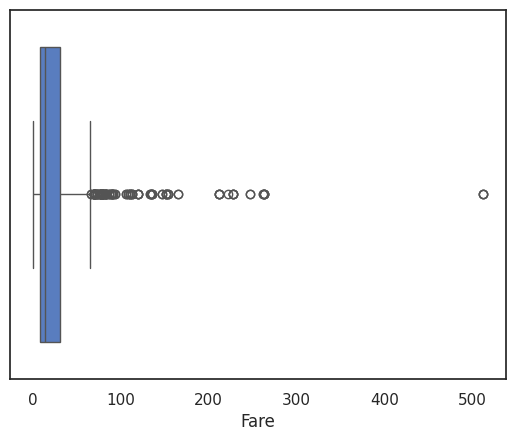

Outliers:
     Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
1           1       1  female  38.0      1      0   71.2833        C
27          0       1    male  19.0      3      2  263.0000        S
31          1       1  female   NaN      1      0  146.5208        C
34          0       1    male  28.0      1      0   82.1708        C
52          1       1  female  49.0      1      0   76.7292        C
..        ...     ...     ...   ...    ...    ...       ...      ...
846         0       3    male   NaN      8      2   69.5500        S
849         1       1  female   NaN      1      0   89.1042        C
856         1       1  female  45.0      1      1  164.8667        S
863         0       3  female   NaN      8      2   69.5500        S
879         1       1  female  56.0      0      1   83.1583        C

[116 rows x 8 columns]


In [414]:
plot_outliers(train_file, 'Fare')

In [415]:
# حذف مقادیر پرت
def remove_outliers_iqr(dataset, column):

    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (dataset[column] < lower_bound) | (dataset[column] > upper_bound)
    
    dataset = dataset[~outliers]

    return dataset

    
train_file = remove_outliers(train_file, 'Age')
train_file = remove_outliers(train_file, 'Fare')

<h4 style="text-align: right;">پس از انجام موارد بالا نباید موارد پرت و تکراری داشته باشیم</h4>

In [416]:
train_file.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [417]:
# بررسی کلی مقادیر مختلف دیتاست
train_file.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,871.000000,871.000000,696.000000,871.000000,871.000000,871.000000
mean,0.376579,2.338691,29.661164,0.517796,0.366246,26.530170
std,0.484806,0.821469,14.571894,1.101448,0.792325,29.351184
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,13.862500
75%,1.000000,3.000000,38.000000,1.000000,0.000000,30.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,164.866700


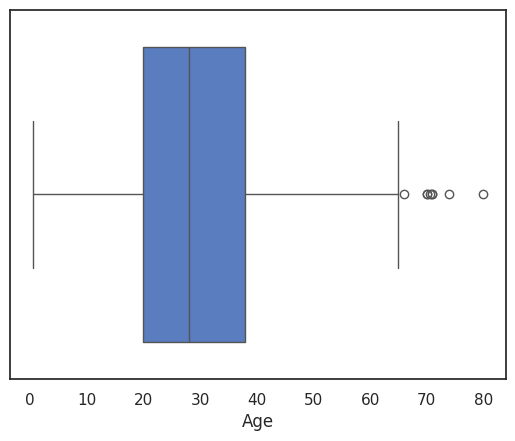

Outliers:
     Survived  Pclass   Sex   Age  SibSp  Parch     Fare Embarked
33          0       2  male  66.0      0      0  10.5000        S
96          0       1  male  71.0      0      0  34.6542        C
116         0       3  male  70.5      0      0   7.7500        Q
493         0       1  male  71.0      0      0  49.5042        C
630         1       1  male  80.0      0      0  30.0000        S
672         0       2  male  70.0      0      0  10.5000        S
745         0       1  male  70.0      1      1  71.0000        S
851         0       3  male  74.0      0      0   7.7750        S


In [418]:
plot_outliers(train_file, 'Age')

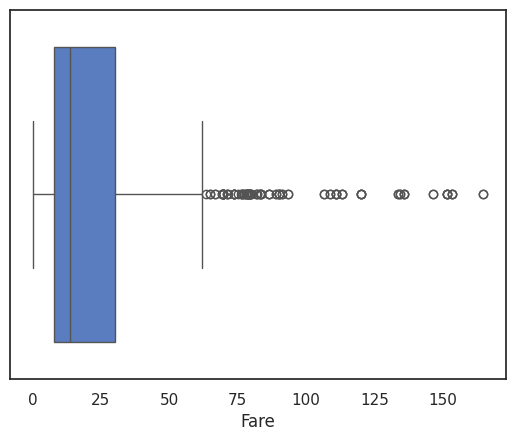

Outliers:
     Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
1           1       1  female  38.0      1      0   71.2833        C
31          1       1  female   NaN      1      0  146.5208        C
34          0       1    male  28.0      1      0   82.1708        C
52          1       1  female  49.0      1      0   76.7292        C
61          1       1  female  38.0      0      0   80.0000      NaN
..        ...     ...     ...   ...    ...    ...       ...      ...
846         0       3    male   NaN      8      2   69.5500        S
849         1       1  female   NaN      1      0   89.1042        C
856         1       1  female  45.0      1      1  164.8667        S
863         0       3  female   NaN      8      2   69.5500        S
879         1       1  female  56.0      0      1   83.1583        C

[99 rows x 8 columns]


In [419]:
plot_outliers(train_file, 'Fare')

<h3 style="text-align: right;">یکپارچه سازی و تبدیل داده ها</h3>

In [420]:
# داده های متعددی برای ادغام وجود ندارد

# عادی سازی مقادیر متغیر های طبقه بندی شده
label_encoder = LabelEncoder()
train_file['Sex'] = label_encoder.fit_transform(train_file['Sex'])
train_file['Embarked'] = label_encoder.fit_transform(train_file['Embarked'])

# لیبل انکودر یک مقدار عددی را نسبت میدهد
# ولی وان هات انکودینگ یک ستون باینری برای هر دسته تشکیل میدهد و از ۱ و ۰ برای نشان دادن حضور یا عدم حضور آن دسته استفاده میکند

train_file.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


<h3 style="text-align: right;">مهندسی ویژگی</h3>
<h4 style="text-align: right;">یافتن ویژگی های جدید و معنادار از ویژگی های موجود</h4>

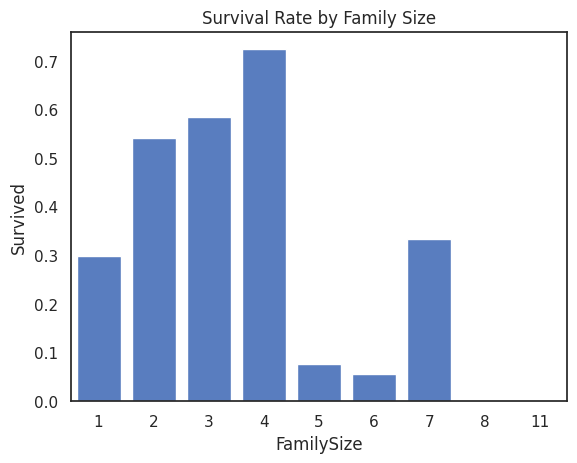

In [421]:
# ساخت ویژگی جدید تعداد اعضای خانواده
train_file['FamilySize'] = train_file['SibSp'] + train_file['Parch'] + 1
train_file = train_file.drop(['SibSp', "Parch"], axis = 1)

# بررسی زنده ماندن افراد بر اساس تعداد اعضای خانواده
sns.barplot(x='FamilySize', y='Survived', data=train_file, errorbar=None)
plt.title('Survival Rate by Family Size')
plt.show()

<h3 style="text-align: right;">رسیدگی به داده های از دست رفته</h3>

In [422]:
# پر کردن مقادیر مفقوده
# برای سن بهترین راه حل پر کردن با مقدار میانی است
train_file["Age"].fillna(train_file["Age"].median(), inplace=True)

# برای پر کردن این مورد از مقداری استفاده میکنیم که بیشترین تکرار را داشته است
train_file["Embarked"].fillna(train_file["Embarked"].mode()[0], inplace=True)

# تبدیل مقادیر اعشاری به حسابی
train_file.Fare = train_file.Fare.astype(int)
train_file.Age = train_file.Age.astype(int)

# بررسی تعداد مقادیر مفقود
train_file.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
FamilySize    0
dtype: int64

<h3 style="text-align: right;">عادی سازی و مقیاس بندی داده ها</h3>

In [423]:
# مقیاس بندی و عادی سازی
min_max_scaler_custom = MinMaxScaler(feature_range=(0, 1))
train_file['Age_MinMax_Scaled'] = min_max_scaler_custom.fit_transform(train_file[['Age']])
train_file['Fare_MinMax_Scaled'] = min_max_scaler_custom.fit_transform(train_file[['Fare']])

train_file.describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Age_MinMax_Scaled,Fare_MinMax_Scaled
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
mean,0.376579,2.338691,0.653272,29.311137,26.110218,1.555683,1.884041,0.366389,0.159209
std,0.484806,0.821469,0.476202,13.049802,29.354305,0.781282,1.598594,0.163123,0.178990
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.000000,1.000000,1.000000,0.275000,0.042683
50%,0.000000,3.000000,1.000000,28.000000,13.000000,2.000000,1.000000,0.350000,0.079268
75%,1.000000,3.000000,1.000000,35.000000,30.000000,2.000000,2.000000,0.437500,0.182927
max,1.000000,3.000000,1.000000,80.000000,164.000000,3.000000,11.000000,1.000000,1.000000


<Axes: >

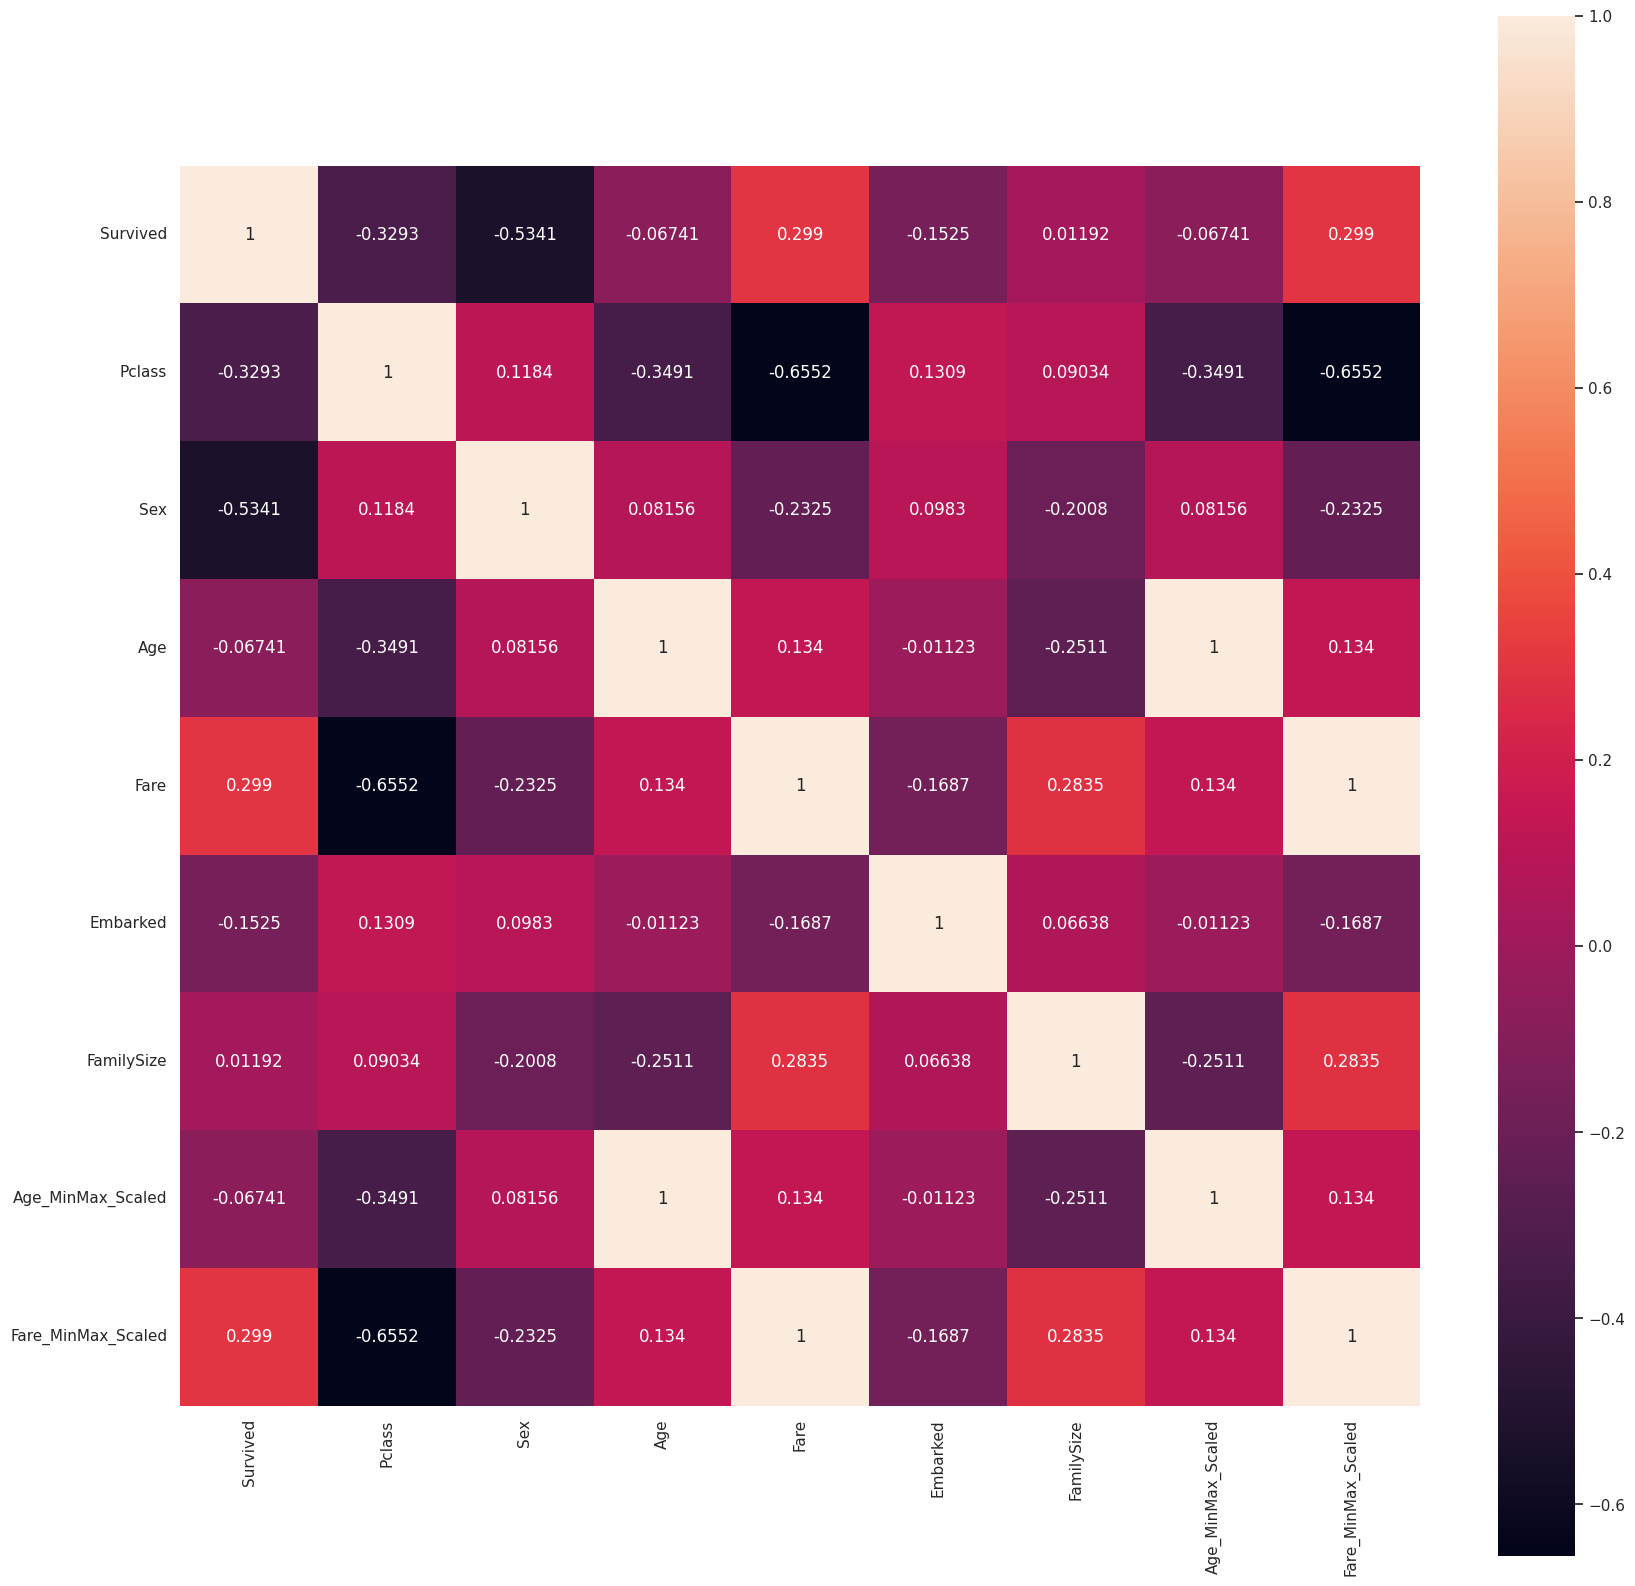

In [424]:
corr = train_file.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, vmax=1, square = True, annot = True, fmt='.4g', ax = ax)

<h4 style="text-align: right;">با استفاده از این نمودار میتوان فهمید که کدام موارد با زنده ماندن یا مردن هر شخص ارتباط بیشتری دارد</h4>
<h4 style="text-align: right;">به عنوان مثال بیشترین ارتباط را جنسیت هر شخص دارد</h4>